In [42]:
from importlib import reload
import src.UNET
import src.preprocessing

reload(src.UNET)
reload(src.preprocessing)

import numpy as np
from src.UNET import UNET
from src.preprocessing import data_generator
from keras.models import load_model, Model

import matplotlib.pyplot as plt


In [43]:
# Load images
PATCH_SIZE = 128

x_train, x_test, y_train, y_test = data_generator(PATCH_SIZE, num_images = 15, rotation_degs=[])


In [44]:
# Build model equal to the tested model

unet = UNET(args = '', image_shape = (PATCH_SIZE, PATCH_SIZE, 3), layers =3)
unet.build_model()
model = unet.get_model()


Building model with 3 layers
Filtersizes being used in UNET: [32, 64, 128, 256]
Bulding contraction layers at layer: 1 and filtersize: 32
Bulding contraction layers at layer: 2 and filtersize: 64
Bulding contraction layers at layer: 3 and filtersize: 128
Building bottleneck at layer: 3 and filtersize: 256
Building expansion at layer: 3 and filtersize: 128
Building expansion at layer: 2 and filtersize: 64
Building expansion at layer: 1 and filtersize: 32
Compiling model...
Model compiled.


In [27]:
unet.describe_model()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_125 (Conv2D)             (None, 256, 256, 16) 448         input_9[0][0]                    
__________________________________________________________________________________________________
conv2d_126 (Conv2D)             (None, 256, 256, 16) 2320        conv2d_125[0][0]                 
__________________________________________________________________________________________________
dropout_57 (Dropout)            (None, 256, 256, 16) 0           conv2d_126[0][0]                 
____________________________________________________________________________________________

In [45]:
model.load_weights('./models/keras-job-dir_no_dropout_weights_epoch25_F10.9613_11.05.h5')

In [46]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 2s 585ms/step


[0.4517654478549957,
 0.9558188915252686,
 0.957366406917572,
 0.9542765021324158,
 0.65020751953125]

In [60]:
# Run predictions
n = 4
pred = model.predict(x_train[n:n+1, :, :, :])
pred[pred > 0.5] = 1
pred[pred <= 0.5] = 0

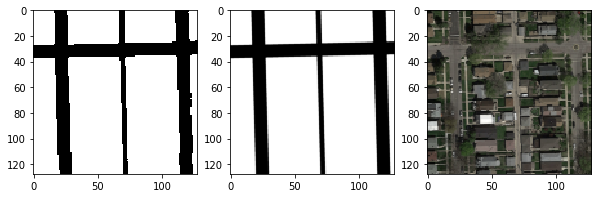

In [61]:

f = plt.figure(figsize = (10, 15))
plt.subplot(1,3,1)
plt.imshow(pred.reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,3,2)
plt.imshow(y_train[n].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,3,3)
plt.imshow(x_train[n].reshape(PATCH_SIZE, PATCH_SIZE, 3))

In [19]:
from skimage.transform import resize

NEW_SIZE = 608
p = np.asarray([resize(pred[i], (608, 608, 1)) for i in range(len(pred))])
p[0].shape

(608, 608, 1)

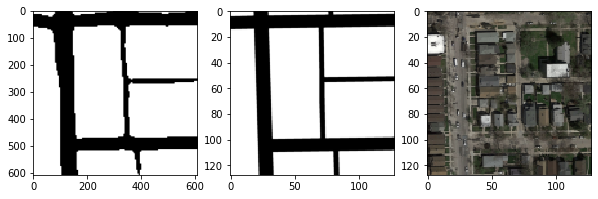

In [20]:
f = plt.figure(figsize = (10, 15))
plt.subplot(1,3,1)
plt.imshow(p.reshape(NEW_SIZE, NEW_SIZE), cmap = 'Greys')
plt.subplot(1,3,2)
plt.imshow(y_train[n].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,3,3)
plt.imshow(x_train[n].reshape(PATCH_SIZE, PATCH_SIZE, 3))

In [64]:
from src.create_submission import create_submission

create_submission('F1-9500.csv', model)


Succesfully created submission.
